# TP2 MI204 - Classification et Aprentissage

CARVALHO FRULANE DE SOUZA Daniel 

GALVÃO Mateus

TAULOIS BRAGA Bernardo

## Préliminaires informatiques

### Importation des librairies pertinentes

In [2]:
import numpy as np
import cv2
import sys
import os

from matplotlib import pyplot as plt

### Lecture de l'image et récuperation des composantes

In [3]:

img_bgr=cv2.imread("Images_classif/Kitti_Road/008.png")

(h,w,c) = img_bgr.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")

b,g,r = cv2.split(img_bgr) # On récupère les 3 composantes   
img_rgb = cv2.merge([r,g,b]) # Convention matplotlib  

img_hsv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv) # On récupère les 3 composantes

img_yuv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
y,cr,cb = cv2.split(img_yuv) # On récupère les 3 composantes


Dimension de l'image : 307 lignes x 835 colonnes x 3 canaux


### Affichage des images

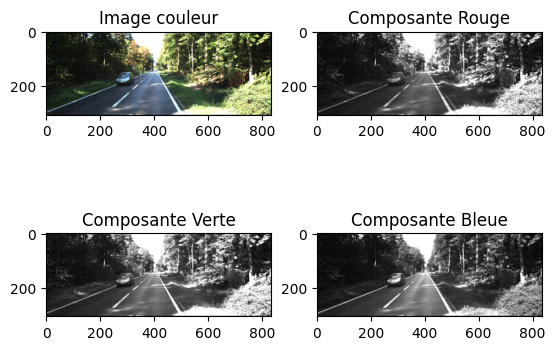

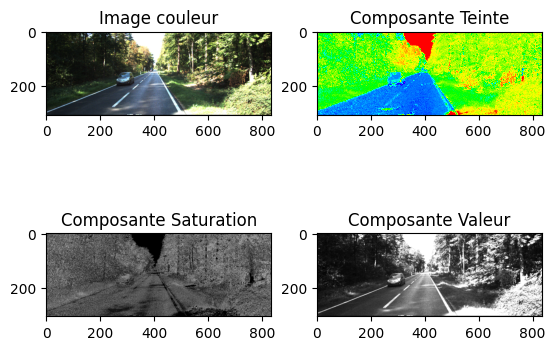

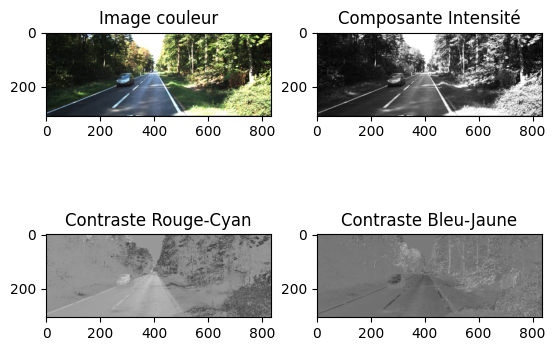

In [4]:
#Affichage des composantes RGB
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(r,cmap = 'gray')
plt.title('Composante Rouge')
plt.subplot(223)
plt.imshow(g,cmap = 'gray')
plt.title('Composante Verte')
plt.subplot(224)
plt.imshow(b,cmap = 'gray')
plt.title('Composante Bleue')
plt.show()

#Affichage des composantes HSV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(h,cmap = 'hsv')
plt.title('Composante Teinte')
plt.subplot(223)
plt.imshow(s,cmap = 'gray')
plt.title('Composante Saturation')
plt.subplot(224)
plt.imshow(v,cmap = 'gray')
plt.title('Composante Valeur')
plt.show()

#Affichage des composantes YUV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(y,cmap = 'gray')
plt.title('Composante Intensité')
plt.subplot(223)
plt.imshow(cr,cmap = 'gray')
plt.title('Contraste Rouge-Cyan')
plt.subplot(224)
plt.imshow(cb,cmap = 'gray')
plt.title('Contraste Bleu-Jaune')
plt.show()

## Principes de la classification bayésienne

Dans le cadre de l'aprentissage bayésienne, on peut choisir parmi deux critères pour optimiser l'estimation :

### Critère du Maximum de Vraisemblance (ML)

Dans ce cas, on essaie de maximiser la fonction de vraisemblance d'une distribution présumée. Cette fonction est définie comme, étant donné les données d'observation $X$ et le paramètre de la distribution $c$ :

$$ c \rightarrow L_n(c;x_1,...,x_n) = P(X|c) = \prod_{i=1}^{n}f_c(x_i) $$

Vu que les observations sont indépendentes et ont comme distribution $f_c(x)$. Ainsi, l'objectif est :

$$ c^{*}(X) = \arg\max_{c} P(X|c) $$

### Critère du Maximum _a posteriori_ (MAP)

Dans ce cas, on associe au paramètre $c$ une distribution _a priori_ $P(c)$. Ainsi, on en obtient, à partir de la Loi de Bayes, sa distribution _a posteriori_ :

$$ P(c|X) = \frac{P(X|c)P(c)}{P(X)} $$

On cherche alors le paramètre $c$ le plus probable après les observations $X$. Ainsi, l'objectif est :

$$ c^{*}(X) = \arg\max_{c} P(c|X) = \arg\max_{c} P(X|c)P(c) = \arg\max_{c} \log P(X|c) + \log P(c) $$

Car la fonction logarithme est monotone. Ainsi, ce qui distingue le ML du MAP est le poids donné à la loi _a priori_. Ainsi, ces fonctions...